# Simple Linear Regression

# Import Necessary Libraries

In [30]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sms
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

# Import the data 

In [4]:
data=pd.read_csv('/Users/viswanathareddy/Assignments /Simple linear regrestion /delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Data Understanding

In [31]:
data.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [33]:
data.isna().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

In [34]:
data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [35]:
data=data.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},axis=1)

<AxesSubplot:xlabel='Delivery_Time', ylabel='Count'>

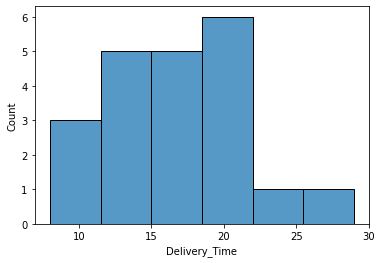

In [36]:
sns.histplot(data['Delivery_Time'])

<AxesSubplot:xlabel='Delivery_Time', ylabel='Count'>

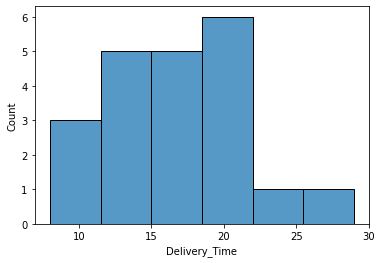

In [37]:
sns.histplot(data['Delivery_Time'])


<AxesSubplot:xlabel='Sorting_Time'>

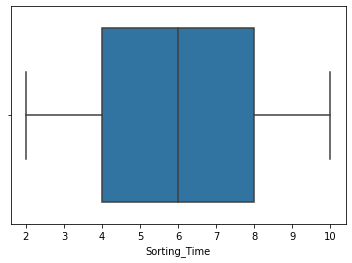

In [38]:
sns.boxplot(data['Sorting_Time'])

<AxesSubplot:xlabel='Delivery_Time'>

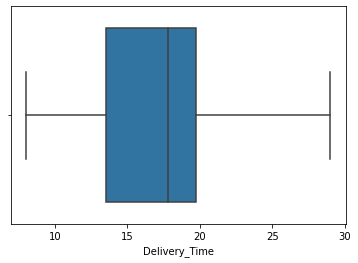

In [39]:
sns.boxplot(data['Delivery_Time'])

In [41]:
# ### as we see from boxplot there is no outlier found and also from info function there is no null value is found so we can build the model 

In [42]:
model=sms.ols("Delivery_Time~Sorting_Time",data=data).fit()

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

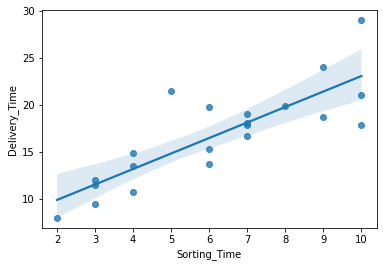

In [43]:
sns.regplot(x=data['Sorting_Time'],y=data['Delivery_Time'],data=data)


In [44]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [45]:
model.rsquared

0.6822714748417231

In [46]:
model.pvalues

Intercept       0.001147
Sorting_Time    0.000004
dtype: float64

In [47]:
model.tvalues

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64

In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 11 Sep 2022   Prob (F-statistic):           3.98e-06
Time:                        12:58:07   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
newdata=pd.Series([8,7,11])

In [ ]:
# # Predict value 

In [50]:
data_pred=pd.DataFrame(newdata,columns=['Sorting_Time'])
data_pred



,Sorting_Time
0,8
1,7
2,11


In [51]:
model.predict(data_pred)

0    19.774893
1    18.125873
2    24.721953
dtype: float64

In [52]:
pred=model.predict(data)
act=data['Delivery_Time']


In [53]:
RSME=np.sqrt(np.mean((act-pred)**2))
RSME



2.791650327061766

In [54]:
model_log=sms.ols("np.log(Delivery_Time)~np.log(Sorting_Time)",data=data).fit()


In [55]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Sun, 11 Sep 2022   Prob (F-statistic):           1.60e-07
Time:                           12:58:27   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""